In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
import os
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
from typing import *
import json

In [2]:
with open("Input.json") as reqirements:
    config=json.load(reqirements)

In [3]:
file1=r'C:\Users\Administrator\Desktop\Project_files\Trade_path\Trades_Calculation_0m-3m.csv'
df1=pd.read_csv(file1)
df1.head(3)

,Symbol,PositionType,Size,EntryDate,ExitDate,EntryTime,ExitTime,TradeTime,EntryPrice,ExitPrice,NetProfit,PercentageProfit,WinTrade,LossTrade,EntrySignal,ExitSignal,EntryCost,ExitCost,MFEPrice,MAEPrice,MFE,MAE,MfeMaeRatio,MFEPercentage,MAEPercentage,MFEFirst,MAEFirst,MFETime,MAETime,IntradayDrawDown,IntradayDrawDownTime,PeakNetProfit,PeakNetProfitTime,StrategyID,DayOfWeek,DayOfMonth,EntryNumber,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,Vol1MinRatioMaxPD123_Volume,Vol1MinRatioMaxPD123_Time,Vol1Min,PreMarketVolume,AllExchangesVolume,Float,PreMarketCurrentGap,PreMarketCurrentGapPerc,PreMarketOpenGapPerc,PreMarketMaxGapUpPerc,PreMarketMaxGapDnPerc,IntradayCurrentMarketGapPerc,CurrentGapPercToPreMarketMaxGapUpPercRatio,CurrentGapPercToPreMarketMaxGapDnPercRatio,IntradayMarketGapPerc,IntradayMarketMaxGapUpPerc,IntradayMarketMaxGapDnPerc,Current_Vol_1Min_PD_Av_1_2_3_10Bars_Ratio,Current_Vol_1Min_PD_Av_2_3_10Bars_Ratio,Current_Vol_1Min_PD_Av_1_10Bars_Ratio,Current_Vol_1Min_PD_Av_1_2_3_390Bars_Ratio,Current_Vol_1Min_PD_Av_2_3_390Bars_Ratio,Current_Vol_1Min_PD_Av_1_390Bars_Ratio,AllExchangesVolume_ADV_3D_Ratio,AllExchangesVolume_ADV_2_3D_Ratio,AllExchangesVolume_ADV_1D_Ratio,AllExchangesVolume_FloatShares_Ratio,TotalVolume,NonOpgAndPreMarketVolume,OpgVolume,PreviousDate,PreviousClose,ATR,PD123_Min1_10Min_Avg,PD123_Min1_390Min_Avg,PD123_Volume_ADV,PD23_Min1_10Min_Avg,PD23_Min1_390Min_Avg,PD23_Volume_ADV,PD1_Min1_10Min_Avg,PD1_Min1_390Min_Avg,PD1_Volume,PreMarketOpen,PreMarketHigh,PreMarketLow,PreMarketClose,PreMarketOpenGap,PreMarketMaxGapUp,PreMarketMaxGapDn,PreMarketHighTime,PreMarketLowTime,IntradayMarketOpen,IntradayMarketHigh,IntradayMarketLow,IntradayMarketClose,IntradayCurrentMarketGap,IntradayMarketGap,IntradayMarketMaxGapUp,IntradayMarketMaxGapDn,IntradayMarketHighTime,IntradayMarketLowTime,Velocity,VWAP,VelocityVWAPSp,Avg_RollingAvg_EstCurrentBidAskSpread,FutureCurrentBid,FutureCurrentAsk,EarningsSymbolDate,EarningsSymbolDatesNumber,EarningsActualTime,EarningsTime,EarningsEstime,EarningsReporting,EarningsSurprise,EarningsPercSurprise,FundMarketCapintraday,FundEnterpriseValue,FundTrailingPE,FundForwardPE,FundPEGRatio5yrexpected,FundPriceSales,FundEnterpriseValueRevenue,FundEnterpriseValueEBITDA,FundFiscalYearEnds,FundMostRecentQuarter,FundProfitMargin,FundOperatingMargin,FundReturnonAssets,FundReturnonEquity,FundRevenue,FundRevenuePerShare,FundQuarterlyRevenueGrowth,FundGrossProfit,FundEBITDA,FundNetIncomeAvitoCommon,FundDilutedEPS,FundQuarterlyEarningsGrowth,FundTotalCash,FundTotalCashPerShare,FundTotalDebt,FundTotalDebtEquity,FundCurrentRatio,FundBookValuePerShare,FundOperatingCashFlow,FundLeveredFreeCashFlow,FundBeta,Fund52WeekChange,Fund52WeekHigh,Fund52WeekLow,Fund50DayMovingAverage,Fund200DayMovingAverage,FundAvgVol3month,FundAvgVol10day,FundSharesOutstanding,FundFloat,FundPercHeldbyInsiders,FundSharesShort,FundShortRatio,FundShortPercofFloat,FundShortPercofSharesOutstanding,FundForwardAnnualDividendRate,FundForwardAnnualDividendYield,FundTrailingAnnualDividendRate,FundTrailingAnnualDividendYield,Fund5YearAverageDividendYield,FundPayoutRatio,FundDividendDate,FundExDividendDate,FundLastSplitFactor,FundLastSplitDate,Column1,FL,PR,PRFIL,EntrySeconds,TM_1m,TM_5m,TM_10m,Vol1mR,GP,IH_PH,IL_PL,PreMarketHigh_BA_Delta,PreMarketLow_BA_Delta,PH_ba,PL_ba,DollerPerShare,Max_AllExchangesVolume_ADV_3D_Ratio,IntradayOpenCurrentGapDifPerc
0,EBAY,Long,1000,20190301,20190301,09:30:09.163,09:30:28.597,00:00:19.4337180,38.52,38.484,-36,-0.000468,0,1,PMHBR_1,PMHBR_1_PT1__PT2__PT3__SL,38520,-38484,38.60,38.37,80.0,-150.0,0.533333,0.002077,-0.003894,True,False,09:30:14.065,09:30:28.355,230.0,09:30:28.355,80.0,09:30:14.065,ABCDStrategy_4_dvBA_EBAY_Sim,Friday,1,0,4.1,536443,115212,3/1/2019 9:30:09 AM,115212,275281,536443,823380000,1.21,3.257066,0.807537,3.633917,0.0,3.257066,100.000000,0.0,3.230148,3.714670,0.0,2.3,1.9,4.1,4,4,6,5.3,4.6,7.4,0,536443,117396,143766,2/28/2019 12:00:00 AM,37.15,0.21,50517.3333,25841.1074,10114215,61755.9000,

### filtering data from json given requirements

In [4]:
config["DataFrameFilters"]

[{'EntrySeconds': 'Maximum', 'Maximum': '420'},
 {'PositionType': 'Equals', 'Equals': 'Short'},
 {'Float': 'MinimumMaximum', 'Minimum': '0', 'Maximum': '500000000'},
 {'EntryPrice': 'MinimumMaximum', 'Minimum': '20', 'Maximum': '180'}]

In [5]:
filterdata= df1[(df1["EntrySeconds"] <= int(config["DataFrameFilters"][0]["Maximum"])) &
               (df1["PositionType"] == config["DataFrameFilters"][1]["Equals"]) &
               (df1["Float"].between(int(config["DataFrameFilters"][2]["Minimum"]) ,int(config["DataFrameFilters"][2]["Maximum"]), inclusive = False)) &
               (df1["EntryPrice"].between(int(config["DataFrameFilters"][3]["Minimum"]) ,int(config["DataFrameFilters"][3]["Maximum"]), inclusive = False))].reset_index(drop=True)

In [6]:
filterdata.head()

,Symbol,PositionType,Size,EntryDate,ExitDate,EntryTime,ExitTime,TradeTime,EntryPrice,ExitPrice,NetProfit,PercentageProfit,WinTrade,LossTrade,EntrySignal,ExitSignal,EntryCost,ExitCost,MFEPrice,MAEPrice,MFE,MAE,MfeMaeRatio,MFEPercentage,MAEPercentage,MFEFirst,MAEFirst,MFETime,MAETime,IntradayDrawDown,IntradayDrawDownTime,PeakNetProfit,PeakNetProfitTime,StrategyID,DayOfWeek,DayOfMonth,EntryNumber,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,Vol1MinRatioMaxPD123_Volume,Vol1MinRatioMaxPD123_Time,Vol1Min,PreMarketVolume,AllExchangesVolume,Float,PreMarketCurrentGap,PreMarketCurrentGapPerc,PreMarketOpenGapPerc,PreMarketMaxGapUpPerc,PreMarketMaxGapDnPerc,IntradayCurrentMarketGapPerc,CurrentGapPercToPreMarketMaxGapUpPercRatio,CurrentGapPercToPreMarketMaxGapDnPercRatio,IntradayMarketGapPerc,IntradayMarketMaxGapUpPerc,IntradayMarketMaxGapDnPerc,Current_Vol_1Min_PD_Av_1_2_3_10Bars_Ratio,Current_Vol_1Min_PD_Av_2_3_10Bars_Ratio,Current_Vol_1Min_PD_Av_1_10Bars_Ratio,Current_Vol_1Min_PD_Av_1_2_3_390Bars_Ratio,Current_Vol_1Min_PD_Av_2_3_390Bars_Ratio,Current_Vol_1Min_PD_Av_1_390Bars_Ratio,AllExchangesVolume_ADV_3D_Ratio,AllExchangesVolume_ADV_2_3D_Ratio,AllExchangesVolume_ADV_1D_Ratio,AllExchangesVolume_FloatShares_Ratio,TotalVolume,NonOpgAndPreMarketVolume,OpgVolume,PreviousDate,PreviousClose,ATR,PD123_Min1_10Min_Avg,PD123_Min1_390Min_Avg,PD123_Volume_ADV,PD23_Min1_10Min_Avg,PD23_Min1_390Min_Avg,PD23_Volume_ADV,PD1_Min1_10Min_Avg,PD1_Min1_390Min_Avg,PD1_Volume,PreMarketOpen,PreMarketHigh,PreMarketLow,PreMarketClose,PreMarketOpenGap,PreMarketMaxGapUp,PreMarketMaxGapDn,PreMarketHighTime,PreMarketLowTime,IntradayMarketOpen,IntradayMarketHigh,IntradayMarketLow,IntradayMarketClose,IntradayCurrentMarketGap,IntradayMarketGap,IntradayMarketMaxGapUp,IntradayMarketMaxGapDn,IntradayMarketHighTime,IntradayMarketLowTime,Velocity,VWAP,VelocityVWAPSp,Avg_RollingAvg_EstCurrentBidAskSpread,FutureCurrentBid,FutureCurrentAsk,EarningsSymbolDate,EarningsSymbolDatesNumber,EarningsActualTime,EarningsTime,EarningsEstime,EarningsReporting,EarningsSurprise,EarningsPercSurprise,FundMarketCapintraday,FundEnterpriseValue,FundTrailingPE,FundForwardPE,FundPEGRatio5yrexpected,FundPriceSales,FundEnterpriseValueRevenue,FundEnterpriseValueEBITDA,FundFiscalYearEnds,FundMostRecentQuarter,FundProfitMargin,FundOperatingMargin,FundReturnonAssets,FundReturnonEquity,FundRevenue,FundRevenuePerShare,FundQuarterlyRevenueGrowth,FundGrossProfit,FundEBITDA,FundNetIncomeAvitoCommon,FundDilutedEPS,FundQuarterlyEarningsGrowth,FundTotalCash,FundTotalCashPerShare,FundTotalDebt,FundTotalDebtEquity,FundCurrentRatio,FundBookValuePerShare,FundOperatingCashFlow,FundLeveredFreeCashFlow,FundBeta,Fund52WeekChange,Fund52WeekHigh,Fund52WeekLow,Fund50DayMovingAverage,Fund200DayMovingAverage,FundAvgVol3month,FundAvgVol10day,FundSharesOutstanding,FundFloat,FundPercHeldbyInsiders,FundSharesShort,FundShortRatio,FundShortPercofFloat,FundShortPercofSharesOutstanding,FundForwardAnnualDividendRate,FundForwardAnnualDividendYield,FundTrailingAnnualDividendRate,FundTrailingAnnualDividendYield,Fund5YearAverageDividendYield,FundPayoutRatio,FundDividendDate,FundExDividendDate,FundLastSplitFactor,FundLastSplitDate,Column1,FL,PR,PRFIL,EntrySeconds,TM_1m,TM_5m,TM_10m,Vol1mR,GP,IH_PH,IL_PL,PreMarketHigh_BA_Delta,PreMarketLow_BA_Delta,PH_ba,PL_ba,DollerPerShare,Max_AllExchangesVolume_ADV_3D_Ratio,IntradayOpenCurrentGapDifPerc
0,FNKO,Short,-1000,20190301,20190301,09:30:32.123,09:32:31.350,00:01:59.2271070,23.22,23.052,168,0.003631,1,0,LL1_GR_1,LL1_GR_1_PT1__PT2__PT3__SL,-23220,23052,22.58,23.36,640.0,-140.0,4.571429,-0.027562,0.006029,True,False,09:30:44.126,09:32:31.003,780.0,09:32:31.003,640.0,09:30:44.126,ABCDStrategy_4_dvBA_FNKO_Sim,Friday,1,0,60.7,387548,115777,3/1/2019 9:30:32 AM,115777,161862,387548,11730000,4.41,22.171946,16.892911,24.082453,0.000000,22.171946,70.354906,0.000000,22.272499,22.272499,0.000000,51.3,60.7,39.1,54,67,38,59.0,81.6,38.0,3,387548,133189,92497,2/28/2019 12:00:00 AM,19.89,0.3700,2258.51

### replace nan value from Fund52WeekChange which is given as ('∞%') to 0% as change in a stock cannot be in infinity 

In [7]:
#counting to numner nan value is present
print(f"the total no of nan value in Fund52WeekChange  is :  {filterdata['Fund52WeekChange'].str.count('∞%').sum()}.")

the total no of nan value in Fund52WeekChange  is :  270.


In [8]:
# As every data point is important here we cant drop the rows so its been replaced by 0% as specified in requirement documnet
filterdata['Fund52WeekChange']=filterdata['Fund52WeekChange'].replace('∞%',"0%")
filterdata['Fund52WeekChange']=filterdata['Fund52WeekChange'].str[:-1].astype(float)

### filtering columns as specified in the requirement document

In [9]:
filterdata=filterdata.loc[:,['EntrySeconds','Float','FundShortRatio','FundShortPercofFloat','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume','IntradayCurrentMarketGapPerc','Fund52WeekChange','PercentageProfit','WinTrade']]

In [10]:
filterdata.head(2)

,EntrySeconds,Float,FundShortRatio,FundShortPercofFloat,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,AllExchangesVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,PercentageProfit,WinTrade
0,32.123,11730000,6.13,21.35,60.7,387548,387548,22.171946,0.00,0.003631,1
1,222.197,263610000,7.18,13.23,31.8,4148592,5058957,18.110236,-29.83,0.000366,1


### Finding corelation Matrix 

In [11]:
filterdata.corr()

,EntrySeconds,Float,FundShortRatio,FundShortPercofFloat,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,AllExchangesVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,PercentageProfit,WinTrade
EntrySeconds,1.000000,0.011328,0.028441,-0.023853,0.073879,0.045449,0.095277,0.060605,-0.024028,0.025998,0.036445
Float,0.011328,1.000000,-0.119092,-0.243514,-0.184902,0.029455,0.034919,-0.095521,-0.116127,0.053616,0.106680
FundShortRatio,0.028441,-0.119092,1.000000,0.415234,0.179960,-0.029002,-0.038366,-0.025086,-0.063921,0.062713,0.027136
FundShortPercofFloat,-0.023853,-0.243514,0.415234,1.000000,0.114325,-0.019770,-0.021044,0.065389,-0.039753,-0.020546,-0.022018
Vol1MinRatioMaxPD123,0.073879,-0.184902,0.179960,0.114325,1.000000,0.160807,0.160620,0.031009,-0.045585,-0.045633,-0.016755
Vol1MinRatioMaxPD123_TotalVolume,0.045449,0.029455,-0.029002,-0.019770,0.160807,1.000000,0.990143,0.050618,-0.002383,0.022535,0.040137
AllExchangesVolume,0.095277,0.034919,-0.038366,-0.021044,0.160620,0.990143,1.000000,0.057492,0.007788,0.025408,0.039846
IntradayCurrentMarketGapPerc,0.060605,-0.095521,-0.025086,0.065389,0.031009,0.050618,0.057492,1.000000,0.120956,-0.086754,-0.033861
Fund52WeekChange,-0.024028,-0.116127,-0.063921,-0.039753,-0.045585,-0.002383,0.007788,0.120956,1.000000,-0.000612,-0.014929
PercentageProfit,0.025998,0.053616,0.062713,-0.020546,-0.045633,0.022535,0.025408,-0.086754,-0.000612,1.000000,0.658972


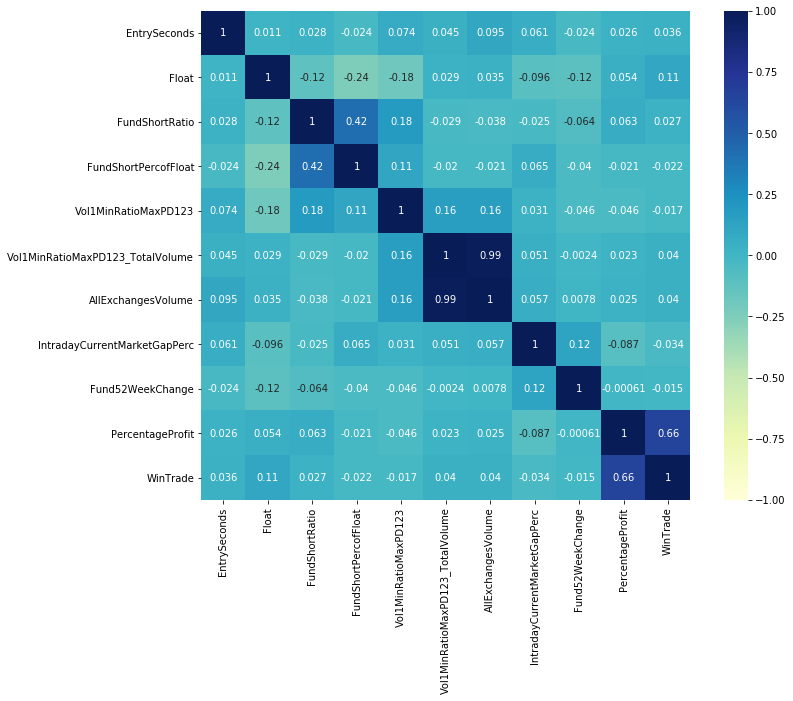

In [12]:
corrmat =filterdata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin=-1, vmax=1, square=True,cmap="YlGnBu",annot=True);

#### we can clearly see the correlation between the two var i.e. AllExchange vs Vol1MinRatioMaPD123_TotalVolume. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these two variables, we can conclude that they give almost the same information so multicollinearity really occurs.

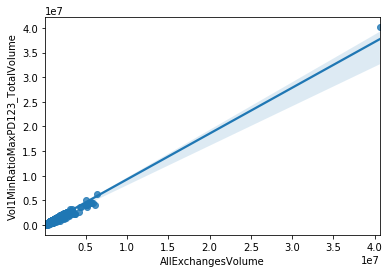

In [13]:
sns.regplot(data=filterdata,x='AllExchangesVolume',y='Vol1MinRatioMaxPD123_TotalVolume')


#### there is no difference between the two varibale ,One Variable would be suffice to explain other that makes other Variable redundant for our model

In [14]:
#dropping a variable to avoid multicollinearity
filterdata.drop(['AllExchangesVolume'],1,inplace=True)

### looking at the collinearity between the independent variable VS two dependent variable we have i.e. [ WINTRADE , PERCENTPROFIT]

In [15]:
filterdata[filterdata.columns[:]].corr()['WinTrade'][:].sort_values(ascending=False)

WinTrade                            1.000000
PercentageProfit                    0.658972
Float                               0.106680
Vol1MinRatioMaxPD123_TotalVolume    0.040137
EntrySeconds                        0.036445
FundShortRatio                      0.027136
Fund52WeekChange                   -0.014929
Vol1MinRatioMaxPD123               -0.016755
FundShortPercofFloat               -0.022018
IntradayCurrentMarketGapPerc       -0.033861
Name: WinTrade, dtype: float64

In [16]:
filterdata[filterdata.columns[:]].corr()['PercentageProfit'][:].sort_values(ascending=False)

PercentageProfit                    1.000000
WinTrade                            0.658972
FundShortRatio                      0.062713
Float                               0.053616
EntrySeconds                        0.025998
Vol1MinRatioMaxPD123_TotalVolume    0.022535
Fund52WeekChange                   -0.000612
FundShortPercofFloat               -0.020546
Vol1MinRatioMaxPD123               -0.045633
IntradayCurrentMarketGapPerc       -0.086754
Name: PercentageProfit, dtype: float64

In [17]:
filterdata.describe()

,EntrySeconds,Float,FundShortRatio,FundShortPercofFloat,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,PercentageProfit,WinTrade
count,1541.000000,1.541000e+03,1541.00000,1541.000000,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000
mean,199.377006,1.484884e+08,3.80072,9.538384,23.981181,5.756835e+05,0.962845,5.793913,0.000077,0.596366
std,117.942551,1.250614e+08,3.13645,19.266595,49.409866,1.193207e+06,10.538557,57.970309,0.011681,0.490785
min,0.184000,2.261000e+04,0.00000,0.000000,0.100000,4.616600e+04,-50.467836,-100.000000,-0.144686,0.000000
25%,103.476000,5.284000e+07,1.65000,1.440000,3.800000,2.047810e+05,-4.146806,-28.090000,-0.004522,0.000000
50%,194.428000,1.029200e+08,2.97000,5.460000,11.700000,3.345790e+05,2.218608,0.000000,0.001039,1.000000
75%,295.736000,2.248000e+08,5.22000,11.150000,27.300000,6.093800e+05,5.735976,15.820000,0.005401,1.000000
max,419.523000,4.973100e+08,32.30000,201.960000,731.400000,4.014714e+07,66.226913,422.320000,0.048320,1.000000


#### from this Descriptive analysis we can clearly see that the scales of the varible are differing a long so it would be a problem non tree based model and for dimentionality reduction techniques 

In [18]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()

In [19]:
filterdata.loc[:,:'Fund52WeekChange']=rs.fit_transform(filterdata.loc[:,:'Fund52WeekChange'])

In [20]:
filterdata.tail()

,EntrySeconds,Float,FundShortRatio,FundShortPercofFloat,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,PercentageProfit,WinTrade
1536,0.171923,-0.367353,1.308123,1.642636,1.089362,-0.059886,1.156556,-0.826463,0.012169,1
1537,-0.069006,-0.367353,1.308123,1.642636,-0.097872,-0.366170,1.156556,-0.826463,0.020379,1
1538,0.171923,-0.367353,1.308123,1.642636,1.089362,-0.059886,1.156556,-0.826463,0.012169,1
1539,-0.690242,-0.146778,3.050420,2.247168,1.634043,0.175188,1.020724,-0.174448,-0.005403,0
1540,0.713591,1.761514,-0.081232,-0.562307,0.395745,-0.370248,-1.149910,1.098155,0.010516,1


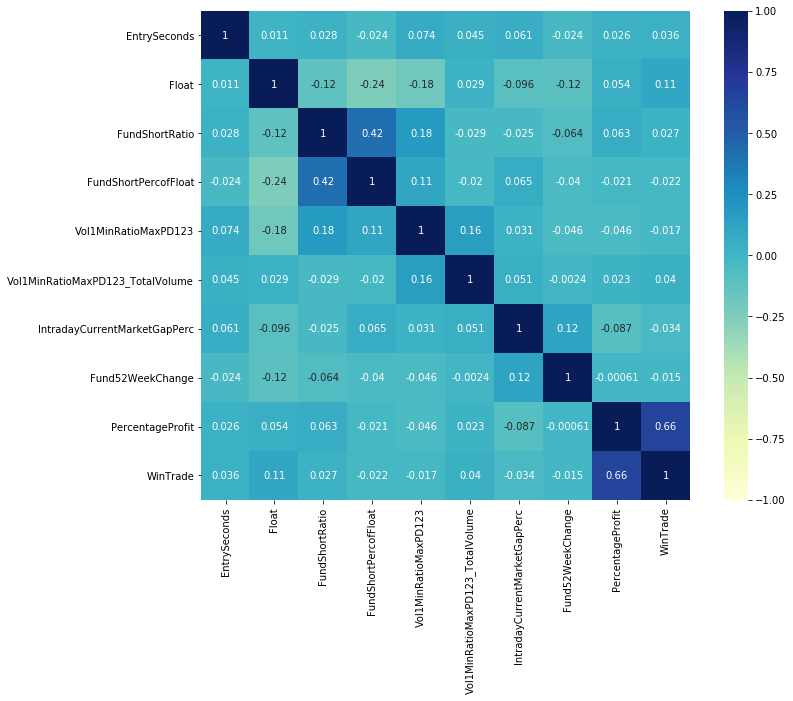

In [21]:
corrmat =filterdata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin=-1, vmax=1, square=True,cmap="YlGnBu",annot=True);

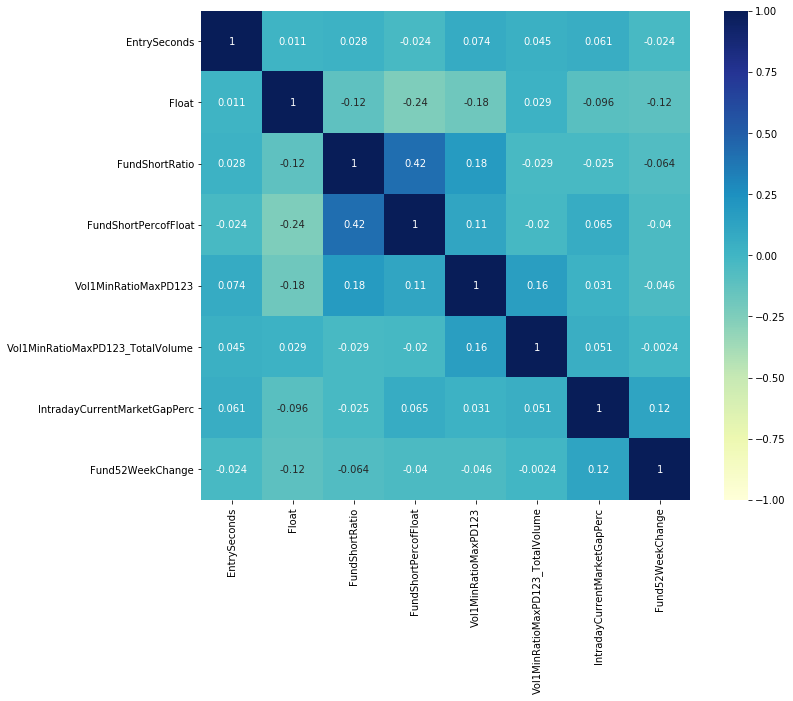

In [22]:
corrmat =filterdata.iloc[:,:-2].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin=-1, vmax=1, square=True,cmap="YlGnBu",annot=True);

In [23]:
filterdata=filterdata.reset_index(drop=True)

In [24]:
train=filterdata.iloc[:926,:]
test=filterdata.iloc[926:,:]

In [25]:
train.head(5)

,EntrySeconds,Float,FundShortRatio,FundShortPercofFloat,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,PercentageProfit,WinTrade
0,-0.844195,-0.530298,0.885154,1.636457,2.085106,0.130917,2.019000,0.000000,0.003631,1
1,0.144435,0.934462,1.179272,0.800206,0.855319,9.426650,1.608011,-0.679344,0.000366,1
2,0.144435,0.934462,1.179272,0.800206,0.855319,9.426650,1.608011,-0.679344,0.000366,1
3,0.981483,0.249360,0.162465,0.234809,3.680851,8.118179,-2.925346,-0.841949,0.000698,1
4,-0.256143,-0.235287,0.103641,0.617920,0.434043,0.555869,1.368251,3.892963,0.003924,1


In [26]:
test.tail(5)

,EntrySeconds,Float,FundShortRatio,FundShortPercofFloat,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,PercentageProfit,WinTrade
1536,0.171923,-0.367353,1.308123,1.642636,1.089362,-0.059886,1.156556,-0.826463,0.012169,1
1537,-0.069006,-0.367353,1.308123,1.642636,-0.097872,-0.366170,1.156556,-0.826463,0.020379,1
1538,0.171923,-0.367353,1.308123,1.642636,1.089362,-0.059886,1.156556,-0.826463,0.012169,1
1539,-0.690242,-0.146778,3.050420,2.247168,1.634043,0.175188,1.020724,-0.174448,-0.005403,0
1540,0.713591,1.761514,-0.081232,-0.562307,0.395745,-0.370248,-1.149910,1.098155,0.010516,1


## Checking for imbalance data

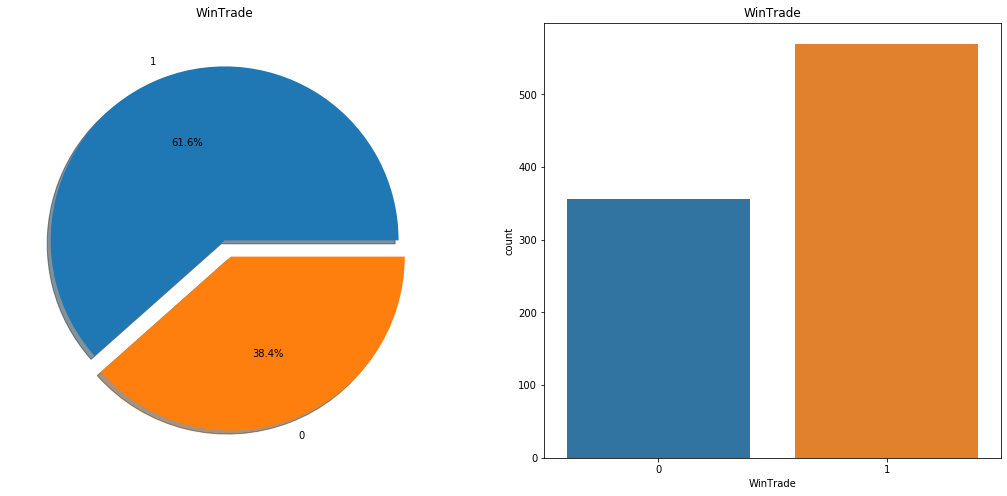

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['WinTrade'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('WinTrade')
ax[0].set_ylabel('')
sns.countplot('WinTrade',data=train,ax=ax[1])
ax[1].set_title('WinTrade')
plt.show()

#### by lookking at the stats our target var are somewhat fairly distributed 

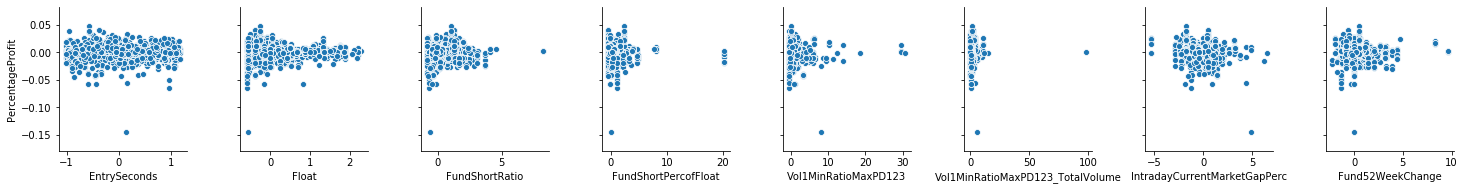

In [28]:
sns.pairplot(data=filterdata,y_vars=['PercentageProfit'],x_vars=['EntrySeconds','Float','FundShortRatio','FundShortPercofFloat','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','IntradayCurrentMarketGapPerc','Fund52WeekChange'])

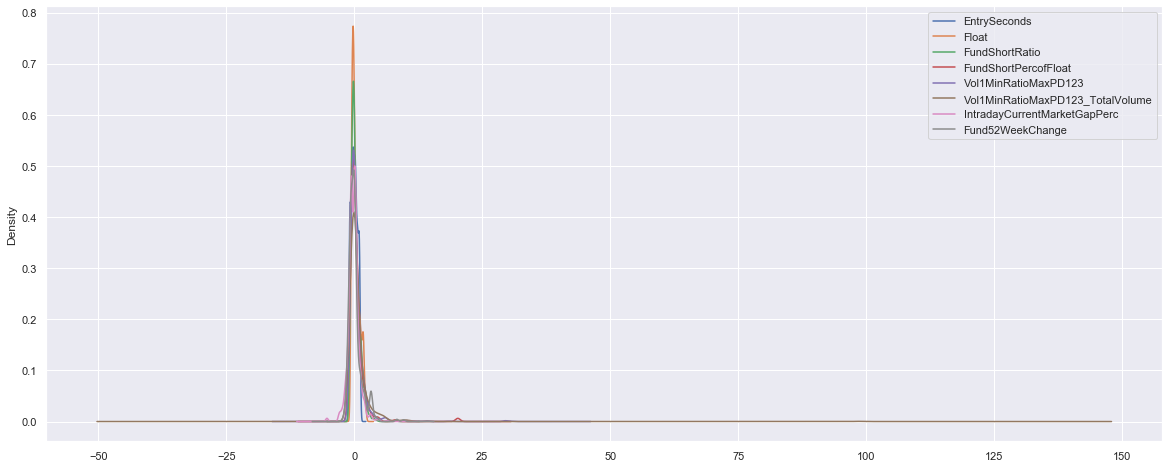

In [31]:
sns.set(rc={"figure.figsize": (20, 8)})
filterdata.drop(['PercentageProfit','WinTrade'],1).plot.kde()

### now we have to Find feature importance using various tree based and non tree based models

In [32]:
#finding feature importance using Rf
train_copy=train.drop(['PercentageProfit'],1)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150, max_depth=3,min_samples_leaf=6,max_features=0.3,n_jobs=-1,random_state=2)
rf.fit(train_copy.drop(['WinTrade'],1),train_copy['WinTrade'])
feature=train_copy.drop(['WinTrade'],1).columns.values
print('--traing done___')

--traing done___


In [34]:
x,y=(list(x) for x in zip(*sorted(zip(rf.feature_importances_,feature)
                                   ,reverse=False)))

trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
          color=x,
           colorscale='Viridis',
          reversescale= True),
    name='RF feature imp',
    orientation='h'
)

layout=dict(
      title='Barplot of fI',
    width=900, height=600,
     yaxis=dict(
          showgrid=False,
           showline=False,
          showticklabels=True))
data=[trace2]

fig1=go.Figure(data=data)
fig1['layout'].update(layout)
py.iplot(fig1,filename='bars')

In [35]:
#using xgboost

In [38]:
import xgboost as xgbp
xgb=xgbp.XGBClassifier(objective='binary:logistic')
xgb.fit(train_copy.drop(['WinTrade'],1),train_copy['WinTrade'])
feature=train_copy.drop(['WinTrade'],1).columns.values
print('--traing done___')

--traing done___


In [39]:
x,y=(list(x) for x in zip(*sorted(zip(xgb.feature_importances_,feature)
                                   ,reverse=False)))

trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
          color=x,
           colorscale='Viridis',
          reversescale= True),
    name='XGBOOST feature imp',
    orientation='h'
)

layout=dict(
      title='Barplot of fI',
    width=900, height=600,
     yaxis=dict(
          showgrid=False,
           showline=False,
          showticklabels=True))
data=[trace2]

fig1=go.Figure(data=data)
fig1['layout'].update(layout)
py.iplot(fig1,filename='bars')

In [40]:
#using GbM
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=150,max_depth=3,min_samples_leaf=3,max_features=0.3,learning_rate=0.05,subsample=0.4,random_state=2)
gb.fit(train_copy.drop(['WinTrade'],1),train_copy['WinTrade'])
feature=train_copy.drop(['WinTrade'],1).columns.values
print('--traing done___')

--traing done___


In [41]:
x,y=(list(x) for x in zip(*sorted(zip(gb.feature_importances_,feature)
                                   ,reverse=False)))

trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
          color=x,
           colorscale='Viridis',
          reversescale= True),
    name='GB feature imp',
    orientation='h'
)

layout=dict(
      title='Barplot of GB',
    width=900, height=600,
     yaxis=dict(
          showgrid=False,
           showline=False,
          showticklabels=True))
data=[trace2]

fig1=go.Figure(data=data)
fig1['layout'].update(layout)
py.iplot(fig1,filename='bars')

In [42]:
#using gini

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [44]:
params={ 'class_weight':['balanced'], 
        'criterion':['gini'],
        'max_depth':[None,2,3,5,],
            'min_samples_leaf':[1,2,5,], 
            'min_samples_split':[2,5,]
       }

In [45]:
clf=DecisionTreeClassifier()
random_search=RandomizedSearchCV(clf,cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=10
                                    )
random_search.fit(train_copy.drop(['WinTrade'],1),train_copy['WinTrade'])

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [46]:
dtree=random_search.best_estimator_
dtree.fit(train_copy.drop(['WinTrade'],1),train_copy['WinTrade'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
from sklearn import tree

dotfile = open("mytree.dot", 'w')

tree.export_graphviz(dtree,out_file=dotfile,
                     feature_names=train_copy.drop(['WinTrade'],1).columns,
                    class_names=["0","1"],
                     proportion=True)
dotfile.close()

##### top 3 for dt is Vol1MinRatioMaxPD123 ,Fund52WeekChange ,Float

#####  mytree.dot file might have been generated in to working directory ( copy and paste in the link to see the tree diagram)  dt can be viewed on : http://webgraphviz.com

In [48]:
#by using pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [49]:
X=train_copy.iloc[:,:-1].copy()

In [50]:
X=scale(X)

In [51]:
pca = PCA(n_components=8)

In [52]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [53]:
pca.components_.shape

(8, 8)

In [54]:
var= pca.explained_variance_ratio_

print(var)

[0.20989477 0.15289636 0.14441459 0.12333079 0.1163341  0.09925459
 0.08337212 0.07050268]


In [55]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

[ 20.99  36.28  50.72  63.05  74.68  84.61  92.95 100.  ]


In [56]:
#showing imp feature of  pca1
pca.components_[0]

array([ 0.02945254, -0.46575365,  0.53145756,  0.58692329,  0.3103652 ,
       -0.18807629,  0.15003321, -0.03272291])

In [57]:
print(abs( pca.components_ ))

[[0.02945254 0.46575365 0.53145756 0.58692329 0.3103652  0.18807629
  0.15003321 0.03272291]
 [0.28543504 0.38950986 0.30452551 0.03537026 0.01158936 0.22606256
  0.50360161 0.60660439]
 [0.55199319 0.00090598 0.10036118 0.07517829 0.48605904 0.59177911
  0.23138471 0.1989567 ]
 [0.19264625 0.14749096 0.06159072 0.17163135 0.59842519 0.02570435
  0.66474811 0.32744409]
 [0.67940811 0.1687576  0.07753669 0.26079688 0.01971065 0.56728254
  0.04029443 0.33477889]
 [0.21793645 0.41213426 0.45830554 0.19410655 0.22052535 0.33552553
  0.13955174 0.59518421]
 [0.22664275 0.58609475 0.13252136 0.1253377  0.50350941 0.33579499
  0.44317797 0.09574888]
 [0.12406335 0.26030824 0.61427475 0.70552038 0.08143319 0.12455789
  0.10460152 0.09310167]]


In [58]:
loadings=pca.components_[0]
loadings

array([ 0.02945254, -0.46575365,  0.53145756,  0.58692329,  0.3103652 ,
       -0.18807629,  0.15003321, -0.03272291])

In [59]:
list(zip(train_copy.iloc[:,:-1].columns,loadings))

[('EntrySeconds', 0.029452543796196395),
 ('Float', -0.4657536476268378),
 ('FundShortRatio', 0.5314575642900111),
 ('FundShortPercofFloat', 0.5869232852750135),
 ('Vol1MinRatioMaxPD123', 0.3103652012686505),
 ('Vol1MinRatioMaxPD123_TotalVolume', -0.1880762888396471),
 ('IntradayCurrentMarketGapPerc', 0.15003321192070887),
 ('Fund52WeekChange', -0.03272290765922242)]

#### by observing all the following classifiers manually  'Vol1MinRatioMaxPD123','FundshortRatio' and a tie between 'float' and 'FundshortPercofFloat'  came out to be the top3 varible

### trainig data using ensemble method


In [65]:
from sklearn.svm import SVC

In [66]:
classifier={'RandomForest':RandomForestClassifier(),
            'GradientBoosting':GradientBoostingClassifier(),
            'XGBClassifier':xgbp.XGBClassifier(objective='binary:logistic'),
            'Decisiontree':DecisionTreeClassifier(),
            
    }

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
for key, classifier in classifier.items():
    classifier.fit(train_copy.drop(['WinTrade'],1),train_copy['WinTrade'])
    training_score = cross_val_score(classifier,train_copy.drop(['WinTrade'],1),train_copy['WinTrade'], cv=5)
    feature=train_copy.drop(['WinTrade'],1).columns.values
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",round(training_score.mean(), 2) * 100, "% accuracy score")
    print('--traing done___')


Classifiers:  RandomForestClassifier Has a training score of 56.99999999999999 % accuracy score
--traing done___
Classifiers:  GradientBoostingClassifier Has a training score of 55.00000000000001 % accuracy score
--traing done___
Classifiers:  XGBClassifier Has a training score of 55.00000000000001 % accuracy score
--traing done___
Classifiers:  DecisionTreeClassifier Has a training score of 50.0 % accuracy score
--traing done___


In [69]:
x,y=(list(x) for x in zip(*sorted(zip(classifier.feature_importances_,feature)
                                   ,reverse=False)))

trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
          color=x,
           colorscale='Viridis',
          reversescale= True),
    name='GB feature imp',
    orientation='h'
)

layout=dict(
      title='Barplot of FI using Ensemble',
    width=900, height=600,
     yaxis=dict(
          showgrid=False,
           showline=False,
          showticklabels=True))
data=[trace2]

fig1=go.Figure(data=data)
fig1['layout'].update(layout)
py.iplot(fig1,filename='bars')

#### the top 3 factors using ensemble are 'Vol1MinRatioMaxPD123','EntrySeconds',''Vol1MinRatioMaxPD123_totalvolume'

In [70]:
from sklearn.manifold import TSNE
import time

In [71]:
X=train_copy.drop(['WinTrade'],1)
y=train_copy['WinTrade']

t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 3.8 s


#### To check if we have a good cluster of win and loss trade or not?

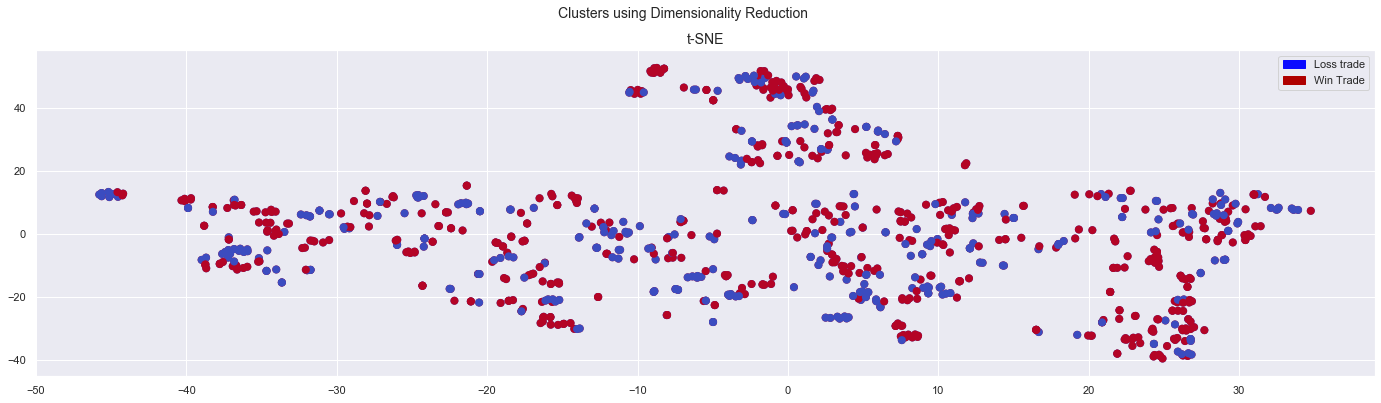

In [72]:
import matplotlib.patches as mpatches
f, (ax1) = plt.subplots(ncols=1, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='Loss trade')
red_patch = mpatches.Patch(color='#AF0000', label='Win Trade')
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Loss trade', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Win Trade', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


### as we got top 3 variables we will train our model

In [73]:
top3=filterdata.loc[:,['Vol1MinRatioMaxPD123','EntrySeconds','Vol1MinRatioMaxPD123_TotalVolume','PercentageProfit','WinTrade']]

In [74]:
top3.head()

,Vol1MinRatioMaxPD123,EntrySeconds,Vol1MinRatioMaxPD123_TotalVolume,PercentageProfit,WinTrade
0,2.085106,-0.844195,0.130917,0.003631,1
1,0.855319,0.144435,9.426650,0.000366,1
2,0.855319,0.144435,9.426650,0.000366,1
3,3.680851,0.981483,8.118179,0.000698,1
4,0.434043,-0.256143,0.555869,0.003924,1


In [75]:
train=top3.iloc[:926,:]
test=top3.iloc[926:,:]

In [76]:
test.shape

(615, 5)

In [77]:
train_r=train.drop(['WinTrade'],axis=1)
test_r=test.drop(['WinTrade'],axis=1)

In [78]:
train_l=train.drop(['PercentageProfit'],1)
test_l=test.drop(['PercentageProfit'],1)

In [79]:
test_l.shape

(615, 4)

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,3,5,7,10,15,20],
            'min_samples_leaf':[1,2,5,10,15], 
            'min_samples_split':[1.0,2,5,10,15]
       }

In [81]:
from sklearn.model_selection import GridSearchCV
clf=DecisionTreeClassifier()
grid_search=GridSearchCV(clf,cv=10,
                        param_grid=params,
                        scoring='roc_auc',
                         n_jobs=-1
                        )
                                    
grid_search.fit(train_l.drop(['WinTrade'],1),train_l['WinTrade'])

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                  

In [82]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
dt_bst=grid_search.best_estimator_

In [84]:
dtpred=dt_bst.predict(test_l.drop(['WinTrade'],1))

In [85]:
accuracy_score(dtpred,test_l['WinTrade'])

0.4943089430894309

In [86]:
dt_mat=pd.DataFrame(list(zip(test_l['WinTrade'],dtpred)),columns=['real','predicted'])

In [87]:
pd.crosstab(dt_mat['real'],dt_mat['predicted'])

predicted,0,1
real,,
0,137,129
1,182,167


In [88]:
## GRID SEARCH TALKING ALOT OF TIME  IN MY SYSTEM SO I am  USING RANDOM SEARCH

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,2,4,5,10,15,20,30],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [90]:
random=RandomizedSearchCV(rf,cv=10,param_distributions=param_dist,
                        scoring='roc_auc',n_iter=10
                        )
                                    
random.fit(train_l.drop(['WinTrade'],1),train_l['WinTrade'])

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [91]:
random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
rf_bst=random.best_estimator_

In [93]:
rf_pred=rf_bst.predict(test_l.drop(['WinTrade'],1))

In [94]:
accuracy_score(rf_pred,test_l['WinTrade'])

0.5495934959349593

In [95]:
rf_mat=pd.DataFrame(list(zip(test_l['WinTrade'],rf_pred)),columns=['real','predicted'])

In [96]:
pd.crosstab(rf_mat['real'],rf_mat['predicted'])

predicted,0,1
real,,
0,125,141
1,136,213


In [97]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_params={'n_estimators':[40,50,100,200,300,500,700],            
           'learning_rate': [0.005,0.01,.05,0.1,0.4,0.8,1],
            'max_depth':[1,2,3,4,5,6],
            'subsample':[0.2,0.4,0.5,0.8,1],
            'max_features':[1,2,3]
           }
gbm=GradientBoostingClassifier()

In [98]:
random_gbm=RandomizedSearchCV(gbm,scoring='roc_auc',param_distributions=gbm_params,
                                 cv=10,n_iter=15,
                                 n_jobs=-1)

In [99]:
random_gbm.fit(train_l.drop(['WinTrade'],1),train_l['WinTrade'])

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                   

In [100]:
random_gbm.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.4, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [101]:
rn_gbbst=random_gbm.best_estimator_

In [102]:
gb_pred=rn_gbbst.predict(test_l.drop(['WinTrade'],1))

In [103]:
accuracy_score(gb_pred,test_l['WinTrade'])

0.5642276422764227

In [104]:
gb_mat=pd.DataFrame(list(zip(test_l['WinTrade'],gb_pred)),columns=['real','predicted'])

In [105]:
pd.crosstab(gb_mat['real'],gb_mat['predicted'])

predicted,0,1
real,,
0,95,171
1,97,252


In [106]:
import xgboost as xgbp
xgb=xgbp.XGBClassifier(objective='binary:logistic')
xgb_params = {  
                "learning_rate":[0.005,0.01,0.05,0.1,0.3,0.5,0.7],
                'max_delta_step':[0,1,3,6,10],
                "max_depth": [2,3,4,5,6,7,8],
                "min_child_weight":[1,2,5,7,10,12],
                "max_delta_step":[0,1,2,5,7,10],
                "subsample":[i/10.0 for i in range(5,10)],
                "colsample_bytree":[i/10.0 for i in range(5,10)],
                "reg_lambda":[1e-5, 1e-2, 0.1, 1, 100], 
                'reg_alpha':[i/10 for i in range(0,50)],
                "scale_pos_weight":[1,2,3,4,5,6,7,8,9],
                "n_estimators":[100,300,500,700,1000]
             }
random_search=RandomizedSearchCV(xgb,n_jobs=-1,cv=10,n_iter=10,scoring='roc_auc',
                                 param_distributions=xgb_params)


In [107]:
random_search.fit(train_l.drop(['WinTrade'],1),train_l['WinTrade'])

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                        'reg_alpha': [0.0, 0.1, 0.2, 0.3, 0.4,
                                                      0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0, 1.1, 1.

In [108]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=12, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=1.5,
              reg_lambda=0.1, scale_pos_weight=5, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
xg_bst=random_search.best_estimator_

In [110]:
xg_pred=xg_bst.predict(test_l.drop(['WinTrade'],1))

In [111]:
accuracy_score(xg_pred,test_l['WinTrade'])

0.5447154471544715

In [112]:
xg_mat=pd.DataFrame(list(zip(test_l['WinTrade'],xg_pred)),columns=['real','predicted'])

In [113]:
pd.crosstab(xg_mat['real'],xg_mat['predicted'])

predicted,0,1
real,,
0,70,196
1,84,265


In [114]:
#combination of all

In [115]:
classifiers={'Decisiontree':DecisionTreeClassifier(),
            'RandomForest':RandomForestClassifier(),
            'GradientBoosting':GradientBoostingClassifier(),
            'XGBClassifier':xgbp.XGBClassifier(objective='binary:logistic')
            }

In [116]:
for key, classifier in classifiers.items():
    classifier.fit(train_l.drop(['WinTrade'],1),train_l['WinTrade'])
    training_score = cross_val_score(classifier,train_l.drop(['WinTrade'],1),train_l['WinTrade'], cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",round(training_score.mean(), 2) * 100, "% accuracy score")
    

Classifiers:  DecisionTreeClassifier Has a training score of 53.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 53.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 56.99999999999999 % accuracy score
Classifiers:  XGBClassifier Has a training score of 54.0 % accuracy score


In [117]:
from sklearn.ensemble import VotingClassifier
model1=DecisionTreeClassifier(random_state=1)
model2=RandomForestClassifier(random_state=1)
model3=GradientBoostingClassifier(random_state=1)
model4=xgbp.XGBClassifier(objective='binary:logistic',random_state=1)
model = VotingClassifier(estimators=[('dt', model1), ('rf', model2),('gbm',model3),('xg',model4)], voting='hard')
model.fit(train_l.drop(['WinTrade'],1),train_l['WinTrade'])
cb=model.predict(test_l.drop(['WinTrade'],1))

In [118]:
accuracy_score(cb,test_l['WinTrade'])

0.5479674796747968

In [119]:
xc_mat=pd.DataFrame(list(zip(test_l['WinTrade'],cb)),columns=['real','predicted'])

In [120]:
pd.crosstab(xc_mat['real'],xc_mat['predicted'])

predicted,0,1
real,,
0,111,155
1,123,226
